# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `<your team number>`
* Students: `<the name of all students in the team>`
* Dataset: `<the dataset you used to complete the milestone>`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [2]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.spatial.distance import squareform 

Number of nodes:  2000
Number of edges:  32646


Text(0.5, 1.05, 'Our graph')

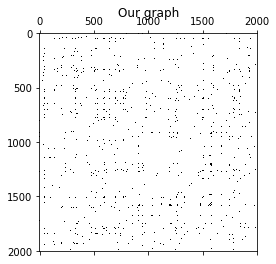

In [91]:
adjacency =  np.load('adjacency.npy')# the adjacency matrix
n_nodes =  adjacency.shape[0]# the number of nodes in the network
n_edges =  np.count_nonzero(adjacency)//2# the number of edges in the network
print('Number of nodes: ', n_nodes)
print('Number of edges: ', n_edges)

adjacency_bin = np.zeros(adjacency.shape)
adjacency_bin[adjacency > 0] = 1

plt.spy(adjacency_bin)
plt.title('Our graph')

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [92]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    if seed is not None:
        np.random.seed(seed)
    flipped_coin = np.random.binomial(1, p, (n*(n-1)//2))
    adjacency = squareform(flipped_coin)
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

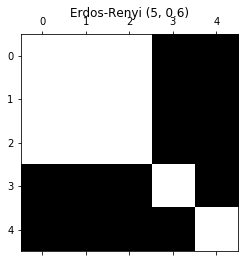

In [93]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

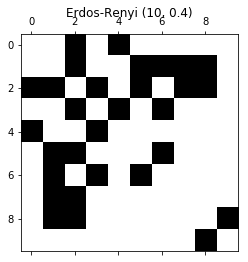

In [94]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

32743.0


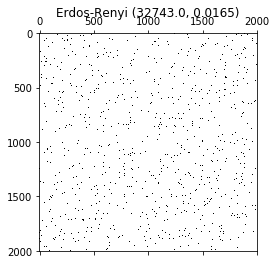

In [95]:
erdos_renyi_graph = erdos_renyi(n_nodes, 0.0165)
n_edges_erdos_renyi = np.sum(erdos_renyi_graph)/2
plt.spy(erdos_renyi_graph)
plt.title('Erdos-Renyi (' + str(n_edges_erdos_renyi)+ ', 0.0165)')
print(n_edges_erdos_renyi)

**Your answer here.**
We had to choose a very low probability (0.0165) for the Erdos-Renyi graph to have a graph as sparse as our own graph. 

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [96]:
def barabasi_albert(n, m, m0=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    if seed is not None:
        np.random.seed(seed)
    adjacency = np.zeros((n,n))
    
    #initial graph with m0 nodes. 
    initial_connection_list = np.zeros((m0*(m0-1)//2,))
    while(not np.all(np.sum(adjacency[:m0,:m0], 0))): #make sure each node has at least one link
        #create random edge between 2 nodes
        new_connection_ind = np.random.randint(0, high=(m0*(m0-1)//2), size=1) 
        if initial_connection_list[new_connection_ind] != 1: 
            initial_connection_list[new_connection_ind]= 1 
            #update adjacency matrix
            adjacency[:m0,:m0] = squareform(initial_connection_list)

    for new_node_ind in range(m0,n):
        connected_count = 0 #in the beginning the node is unconnected
        sum_of_degree = np.sum(np.sum(adjacency[:new_node_ind, :new_node_ind], axis=0))
        
        while (connected_count < m): #until i connect new nodes to m nodes, draw a new node and try to connect
            random_node_ind = np.random.randint(0, high=new_node_ind, size=1) #draw a random existing node
            if (adjacency[new_node_ind, random_node_ind] != 1): #if node is not already connected
                #find degree of this new node
                node_degree = np.sum(adjacency[random_node_ind, :new_node_ind])
                #find sum of degree of all nodes
                p = node_degree/sum_of_degree
                p_drawn = np.random.rand(1,1)
                if p_drawn < p: #connect node
                    adjacency[random_node_ind, new_node_ind] =1
                    adjacency[new_node_ind, random_node_ind] =1
                    connected_count += 1
    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

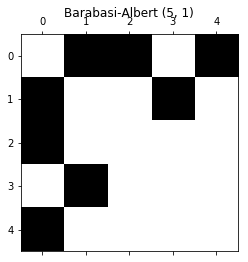

In [80]:
ba = barabasi_albert(5, 1, 2, 9087)

plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

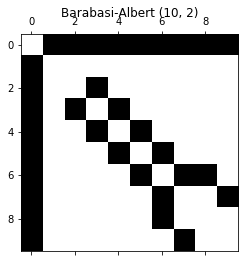

In [81]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [83]:
barabasi_albert_graph = barabasi_albert(2000, 18, 400)
plt.spy(barabasi_albert_graph)
plt.title('Barabasi-Albert (2000, 10)')
n_edges_barabasi_albert = np.sum(barabasi_albert_graph)/2
print(n_edges_barabasi_albert)

KeyboardInterrupt: 

**Your answer here**


### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [97]:
# Your code here.
n_edges_ours =  np.count_nonzero(adjacency)//2# the number of edges in the network
n_edges_erdos_renyi = np.sum(erdos_renyi_graph)/2
n_edges_barabasi_albert = np.sum(barabasi_albert_graph)/2

print("Our edges:", n_edges_ours)
print("Erdos renyi Edges:", n_edges_erdos_renyi)
print("Barabasi-Albert Edges:", n_edges_barabasi_albert)

#They are all similar!

Our edges: 32646
Erdos renyi Edges: 32743.0
Barabasi-Albert Edges: 18060.0


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [84]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    # Your code here.
    kl= -np.sum(np.multiply(p,np.log(q/p)))    
    return kl

def get_KLDivergence(X):
    epsilon = np.min(np.min(X))
    epsilon = 0 if epsilon >0 else -epsilon+1 ##make sure all values are positive
    distmat = []
    ## Iterate to get the JS divergence between each sample ###
    ## Will get an upper triangle of the matrix and then just straighten it###
    for i,sample1 in enumerate(X.values[:-1]):
        for j,sample2 in enumerate(X.values[(i+1):]):
            distmat.append((scipy.stats.entropy(sample1+epsilon, sample2+epsilon) + scipy.stats.entropy(sample2+epsilon, sample1+epsilon))/2)
            #pdb.set_trace()
    return np.array(distmat)


In [90]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
print(kl_divergence(p_test, q_test))

0.0915162218494358


### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

In [107]:
#from milestone 1
def dfs(adjacency, node, visited, connected_list):
    visited[node] = True
    connected_list.append(node)
    #find neighbors of selected node
    neighbors = list(np.argwhere(adjacency[node]>0).squeeze(1))
    for neighbor in neighbors:
        #run dfs for all the neighbors i have not visited
        if not visited[neighbor]:
            dfs(adjacency, neighbor, visited, connected_list)
    #cut out the connected component from the adjacency matrix
    adjacency_graph = adjacency[connected_list,:][:, connected_list]
    return visited, adjacency_graph

def find_components(adjacency):
    components = []
    n_nodes = adjacency.shape[0]
    visited_nodes = [False]*n_nodes
    #After iteration of the below loop, we check if there are still nodes we have not visited.
    #If there are, then these form another connected component. We do this until we have visited all nodes.
    for node in range(n_nodes):
        if not visited_nodes[node]:
            visited_nodes, adjacency_graph = dfs(adjacency, node, visited_nodes, [])
            components.append(adjacency_graph)
    return components

def has_disconnected_nodes(adjacency):
    # Your code here.
    components = find_components(adjacency)
    n_connected_components = len(components)
    print('Number of connected components in our graph: ', n_connected_components)
    smallest_connected_comp_size = min([adj.shape[0] for adj in components])
    print('Smallest connected component size: ', smallest_connected_comp_size)

In [108]:
# Your code here.
n_nodes = 2000

#make sure our graph doesn't have disconnected nodes:
has_disconnected_nodes(adjacency_bin)

degree_sum_ours = np.sum(adjacency_bin)
degree_dist_ours = np.sum(degree_sum_ours, axis=0)/degree_sum_ours

degree_sum_er = np.sum(erdos_renyi_graph)
degree_dist_er = np.sum(erdos_renyi_graph, axis=0)/degree_sum_er

degree_sum_ba = np.sum(barabasi_albert_graph)
degree_dist_ba = np.sum(barabasi_albert_graph, axis=0 )/degree_sum_ba


print(kl_divergence(degree_dist_ours, degree_dist_er))
print(kl_divergence(degree_dist_ours, degree_dist_ba))

Number of connected components in our graph:  216
Largest connected component size:  1
15232.560952883894
15430.93742606595


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

In [ ]:
# Your code here.

**Your answer here.**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [ ]:
# Your code here.

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [ ]:
# Your code here.

Are the results what you expected? Explain.

**Your answer here.**